这一节开始介绍采样相关的内容，在介绍采样技术之前，我们首先需要弄清楚，为什么要采样？采样能用来干嘛？一般来说，采样用于对某个**已知定义的复杂概率分布**计算其相关指标，比如经验分布、均值、方差、以及函数期望等，这句话读起来可能还是有些抽象，下面直接介绍几个采样的应用

### 一.求经验分布
对于某个已知的复杂分布，我们有时需要求解其经验分布，但是手头又没有样本，这时就可以通过采样的方式的求解了，流程如下，通过采样得到的少数样本，我们就可以大致还原原始的概率分布了，当然采的量越多，还原的越精准
![avatar](./source/12_sampling_经验分布demo.png)

### 二.求数学期望
由于能得到随机变量的经验分布，那我们接下来就可以对定义在随机变量空间上的函数求期望啦，假如我们在随机变量$X$上定义了一个函数$f(X)$，假如$X\sim P(x)$，我们对$P(X)$采样了$n$个样本：$\{x_1,x_2,...,x_n\}$，那么就有：   

$$
E_{X\sim P(X)}[f(X)]=\int_xp(x)f(x)dx\approx \frac{1}{n}\sum_{i=1}^nf(x_i)
$$

### 三.求积分
从上面的应用进一步得到启发，推导一个对积分问题进行采样求解的一般方式，假如我们需要求任意一个积分问题：   

$$
\int_xh(x)dx
$$   

我们找一个与积分问题的定义域空间一样的比较简单的分布$X\sim P(X)$，满足$\int_xp(x)dx=1$，并采样$n$个样本点$\{x_1,x_2,...,x_n\}$，那么：       

$$
\int_xh(x)dx=\int_x\frac{h(x)}{p(x)}\cdot p(x)dx \approx \frac{1}{n}\sum_{i=1}^n\frac{h(x_i)}{p(x_i)}
$$   

从上面的第一个等式我们也可以看出，任意一个求积分的问题其实都可以等价于一个求期望的问题

### 四.案例
下面用统计学习书上的两个例子来实操一下

#### 4.1案例一
求积分
$$
\int_0^1e^{-x^2/2}dx
$$  

我们可以令：  

$$
p(x)=1\\
x\sim U(0,1)
$$  

这里，$x\sim U(0,1)$表示随机变量服从$(0,1)$区间上的均匀分布，所以要求该积分只需要在$(0,1)$之间进行采样$\{x_1,x_2,...,x_n\}$，然后求：   

$$
\frac{1}{n}\sum_{i=1}^n\frac{h(x_i)}{p(x_i)}=\frac{1}{n}\sum_{i=1}^nh(x_i)=\frac{1}{n}\sum_{i=1}^ne^{-x_i^2/2}
$$  

即是我们需要的结果，那均匀分布如何采样呢？图方便的话，可以使用`np.random.random()`，但既然这一节是讲抽样，我们还是看看均匀分布的采样原理先

#### 均匀分布采样的简单实现：线性同余
[内容参考自>>>](https://blog.csdn.net/fengying2016/article/details/80573287)，线性同余方法是目前应用广泛的伪随机数生成算法，其基本思想是通过对前一个数进行线性运算并取模从而得到下一个数，递归公式为：   
$$
x_{n+1}=(ax_n+c) \% m\\
y_{n+1}=x_{n+1}/m
$$  

这里$\%$表示取余的意思，其中$a$称为乘数，$c$称为增量，$m$称为模数，当$a=0$时为和同余法，当$c=0$时为乘同余法，$c\neq 0$时为混合同余法。 乘数、增量和模数的选取可以多种多样，只要保证产生的随机数有较好的均匀性和随机性即可，一般采用$m=2^k$的混合同余法。线性同余法的最大周期是m，但一般情况下会小于$m$。要使周期达到最大，应该满足以下条件：    

(1) $c$和$m$互质；    

(2) $m$的所有质因子的积能整除$a-1$；    

(3) 若$m$是4的倍数，则$a-1$也是；    

(4) $a,c,x_0$（初值，一般即种子）都比$m$小；    

(5) $a,c$是正整数。    


下面简单实现一下

In [1]:
# a,c,m可以自己随意设置，只要能满足上面的约束
import numpy as np
def random(size=None,a=9,c=3,m=1024,seed=0):
    rst=[]
    v=seed
    for _ in range(0,size):
        v=(a*v+c)%m
        rst.append(v/m)
    return np.asarray(rst)

看看效果，可以发现采样的量越大越符合均匀分布

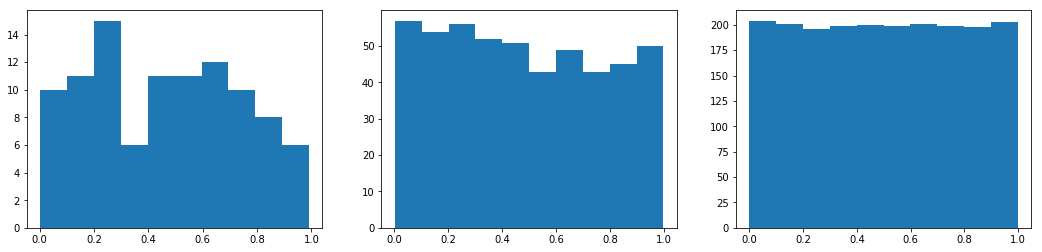

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (18,4))
plt.subplot(1,3,1)
plt.hist(random(100))
plt.subplot(1,3,2)
plt.hist(random(500))
plt.subplot(1,3,3)
plt.hist(random(2000))
plt.show()

下面用我们自己的随机数采样去计算积分值，可以发现采样越多，结果越精准

In [3]:
def func1(x):
    return np.mean(np.exp(-0.5*x*x))

In [4]:
func1(random(10)),func1(random(100)),func1(random(500)),func1(random(1000)),func1(random(5000)),func1(random(10000))

(0.9035390412404333,
 0.8724010595453379,
 0.8636744903733047,
 0.8557742330163529,
 0.8559914695948042,
 0.8560096265779689)

#### 4.2 案例二
也是求积分，如下
$$
\int_{-\infty}^\infty x\frac{1}{\sqrt{2\pi}}exp(\frac{-x^2}{2})dx
$$  

我们可以令：   

$$
p(x)=\frac{1}{\sqrt{2\pi}}exp(\frac{-x^2}{2})
$$  

即$p(x)$刚好是一个标准正态分布的密度函数，那么我们可以对$p(x)$采样$n$个样本$\{x_1,x_2,...,x_n\}$，就可以计算其积分的近似值：   

$$
\frac{1}{n}\sum_{i=1}^n\frac{h(x_i)}{p(x_i)}=\frac{1}{n}\sum_{i=1}^nx_i
$$  

那么问题来了，如何采样呢？均匀分布我们可以使用线性同余的方法，那么标准正态分布勒，我们可以使用`np.random.randn`，哈哈哈~~~ ，接下来介绍一种标准正态分布的采样方式：Box Muller

#### 标准正态分布采样：Box Muller
推导过程见[参看>>>](https://blog.csdn.net/fengying2016/article/details/80570702)，下面直接说结论：   

如果$U_1\sim U(0,1),U_2\sim U(0,1)$，且两者独立，那么：   

$$
X=\sqrt{-2lnU_1}cos(2\pi U_2)\\
Y=\sqrt{-2lnU_1}sin(2\pi U_2)
$$   

$X,Y$相互独立，且均服从标准正态分布，下面简单实现一下

In [5]:
def randn(size=None):
    u1=random(size,seed=0)
    u2=random(size,seed=1)
    return np.sqrt(-2*np.log(u1+1e-12))*np.cos(2*np.pi*u2)

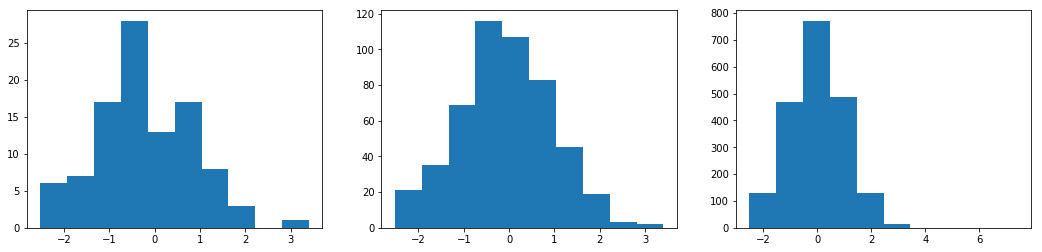

In [6]:
plt.figure(figsize = (18,4))
plt.subplot(1,3,1)
plt.hist(randn(100))
plt.subplot(1,3,2)
plt.hist(randn(500))
plt.subplot(1,3,3)
plt.hist(randn(2000))
plt.show()

好的，接下里可以求我们的积分近似值了...

In [7]:
np.mean(randn(100)),np.mean(randn(500)),np.mean(randn(1000)),np.mean(randn(2000)),np.mean(randn(5000)),np.mean(randn(10000))

(-0.18047523195450427,
 -0.067597124077273,
 -0.004227634117120701,
 0.0027034258396782017,
 0.005011583413871283,
 0.004176713840559121)

显然越接近于0越正确

### 五.分析
从上面的例子也可以看出，决定结果是否精确的重要条件是：**样本能否很好的采样**，如果样本采样后的分布与它的真实分布越接近，那么结果也就越精确，对于均匀分布或者正态分布这样常见的分布，我们已经有成熟的方法进行采样，比如上面的线性同余以及Box Muller方法等，保证采样的结果是我们所期望的，但是对于那些更加一般的分布（比如本页的第一幅图），我们更想找到一个通用的采样方法，使得概率密度高的地方采样多，概率密度低的地方采样少，有的！这便是**蒙特卡洛法（Monte Carlo method,MC）**，见下一节~~~~   

PS：另外，再补充一下，采样的分布是**已知**的~~~